 <div class="alert alert-block alert-info">
    
## Evaluating Regression Models

### Exercise Set

1. Load your zillow dataset.

2. Fit a linear regression model (ordinary least squares) and compute yhat, predictions of taxvaluedollarcnt using only calculatedfinishedsqft.

3. Plot the residuals for the linear regression model that you made.

4. Calculate the sum of squared errors, explained sum of squares, total sum of squares, mean squared error, and root mean squared error for your model.

5. Calculate the sum of squared errors, mean squared error, and root mean squared error for the baseline model (i.e. a model that always predicts the average taxvaluedollarcnt amount).

6. Write python code that compares the sum of squared errors for your model against the sum of squared errors for the baseline model and outputs whether or not your model performs better than the baseline model.

7. What is the amount of variance explained in your model?

8. Is your model better than the baseline model?

9. Create a file named evaluate.py that contains the following functions.
    - plot_residuals(y, yhat): creates a residual plot
    - regression_errors(y, yhat): returns the following values:
        - sum of squared errors (SSE)
        - explained sum of squares (ESS)
        - total sum of squares (TSS)
        - mean squared error (MSE)
        - root mean squared error (RMSE)
    - baseline_mean_errors(y): computes the SSE, MSE, and RMSE for the baseline model
    - better_than_baseline(y, yhat): returns true if your model performs better than the baseline, otherwise falsed

In [2]:


#import ignore warninings
import warnings
warnings.filterwarnings("ignore")

#standard ds imports
import pandas as pd
import numpy as np
from pydataset import data

#visualization imports
import matplotlib.pyplot as plt
import seaborn as sns

#math imports
import math
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from scipy.stats import pearsonr, spearmanr
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.metrics import explained_variance_score

#custom import
import wrangle_zillow



local version found!


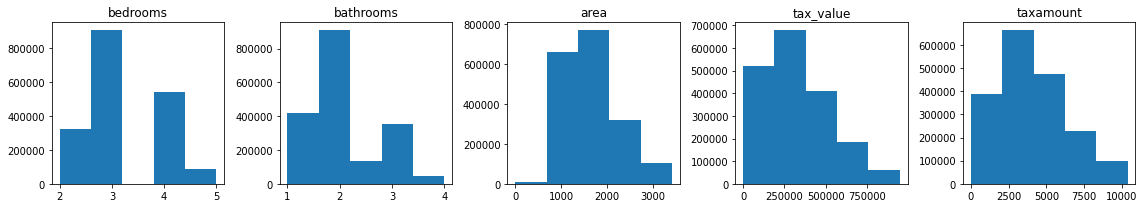

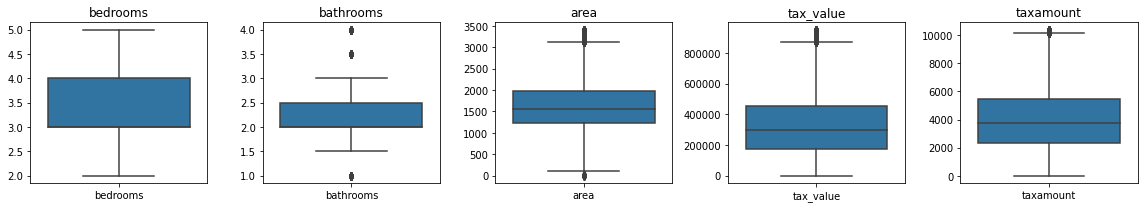

In [8]:
#use the wrangle module to call our custom function
train, validate, test = wrangle_zillow.wrangle_zillow()

In [9]:
train.head()

,bedrooms,bathrooms,area,tax_value,year_built,taxamount,fips
10057,4.0,2.0,1561.0,248240.0,1973.0,2504.40,6059.0
2004970,3.0,2.0,1770.0,88390.0,1960.0,1671.93,6037.0
306031,2.0,1.0,1452.0,81169.0,1946.0,1310.88,6037.0
1038595,3.0,1.0,1000.0,119174.0,1950.0,1900.28,6037.0
270959,3.0,2.0,1974.0,432268.0,1988.0,5315.27,6037.0



## 2. Build a linear regression model

Fit a linear regression model (ordinary least squares) and compute $\hat{Y}$.

This model will predict `taxvaluedollarcnt` using only `calculatedfinishedsqft`.


In [10]:
### Drop extra columns for the purposes of modeling. ###

train = train.drop(columns=['bedrooms','bathrooms',
                    'year_built','taxamount', 'fips'])



In [ ]:
### Scale our data ####
# 1. Create a min-max scaler object
# 2. Fit and transform with the 'area' feature

In [11]:
mms = MinMaxScaler()

train['area'] = mms.fit_transform(train[['area']])


In [14]:
train.head()

,area,tax_value
10057,0.457612,248240.0
2004970,0.518921,88390.0
306031,0.425638,81169.0
1038595,0.293048,119174.0
270959,0.578762,432268.0


In [ ]:
### Split data across features and target ###

In [17]:
X_train = train[['area']]
y_train = train.tax_value

X_validate = validate[['area']]
y_validate = validate.tax_value

X_test = test[['area']]
y_test = test.tax_value

In [ ]:
### Inspect contents of x and y ###

In [19]:
y_train.head()

10057      248240.0
2004970     88390.0
306031      81169.0
1038595    119174.0
270959     432268.0
Name: tax_value, dtype: float64

In [14]:
### Use sklearn's LinearRegression to create a linear regression model

# 1. Fit the model
# 2. Generate predictions

In [20]:
## Step 1 - Build the thing
## Step 2 - fit with the X_traing
model = LinearRegression().fit(X_train, y_train)

In [22]:
## Generate the predictions 

predictions = model.predict(X_train)

In [24]:
predictions

array([314131.12545964, 345309.67434113, 297870.54255016, ...,
       399312.71115978, 197621.8112183 , 250133.05143975])

In [25]:
# Add a column named yhat with predicted values
train['yhat'] = predictions

In [26]:
train.head()

,area,tax_value,yhat
10057,0.457612,248240.0,314131.125460
2004970,0.518921,88390.0,345309.674341
306031,0.425638,81169.0,297870.542550
1038595,0.293048,119174.0,230441.336357
270959,0.578762,432268.0,375742.324924


## Plot the residuals

In [27]:
### (actual - predicted)
train['residuals'] = train.tax_value - train.yhat


In [28]:
train

,area,tax_value,yhat,residuals
10057,0.457612,248240.0,314131.125460,-65891.125460
2004970,0.518921,88390.0,345309.674341,-256919.674341
306031,0.425638,81169.0,297870.542550,-216701.542550
1038595,0.293048,119174.0,230441.336357,-111267.336357
270959,0.578762,432268.0,375742.324924,56525.675076
...,...,...,...,...
991122,0.351423,280857.0,260128.088641,20728.911359
1707759,0.545028,95008.0,358586.664056,-263578.664056
1770246,0.625110,158470.0,399312.711160,-240842.711160
1500741,0.228513,477167.0,197621.811218,279545.188782


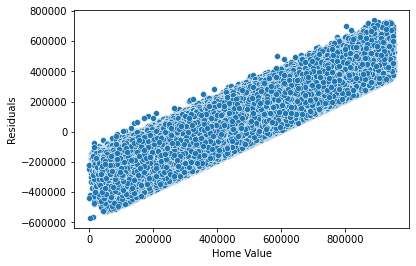

In [31]:
sns.scatterplot(data = train, x='tax_value', y = 'residuals')
plt.xlabel('Home Value')
plt.ylabel('Residuals')
plt.show()

##  Calculate the sum of squared errors, explained sum of squares, total sum of squares, mean squared error, and root mean squared error for your model.

In [ ]:
from sklearn.metrics import mean_squared_error

In [35]:
# Mean squared error
MSE = mean_squared_error(train.tax_value, train.yhat)
MSE

32510725506.882072

In [36]:
## Sum of squared errors
SSE = MSE * len(train)
SSE

3.3777310861904692e+16

In [39]:
## Root mean squared error
## Raising to the power of 1/2 (0.5) is the same as taking the square root
RMSE = MSE ** .5
RMSE

180307.30852320456

In [46]:
## Explained sum of squares
## Sum the squares of the (prediction - mean of tax value)
ESS = ((train.yhat - train.tax_value.mean())**2).sum()
ESS

7361327054838071.0

In [47]:
## Total sum of squares
## TSS = ESS + SSE
TSS = ESS + SSE
TSS

4.113863791674276e+16

In [48]:
## ESS = TSS - SSE
TSS - SSE

7361327054838068.0

###  Calculate the sum of squared errors, mean squared error, and root mean squared error for the baseline model (i.e. a model that always predicts the average taxvaluedollarcnt amount).


In [50]:
## Assign a baseline prediction that is equal to the mean of the target variable

train['baseline'] = train.tax_value.mean()

In [51]:
train.head()

,area,tax_value,yhat,residuals,baseline
10057,0.457612,248240.0,314131.125460,-65891.125460,327962.928757
2004970,0.518921,88390.0,345309.674341,-256919.674341,327962.928757
306031,0.425638,81169.0,297870.542550,-216701.542550,327962.928757
1038595,0.293048,119174.0,230441.336357,-111267.336357,327962.928757
270959,0.578762,432268.0,375742.324924,56525.675076,327962.928757


In [52]:
### Compute the mean squared error for the baseline

MSE_baseline = mean_squared_error(train.tax_value, train.baseline)
MSE_baseline

39596016702.04775

In [54]:
## Use the MSE to find the SSE
SSE_baseline = MSE_baseline * len(train)
SSE_baseline

4.113863791674283e+16

In [55]:
# Find RSME
RMSE_baseline = MSE_baseline**0.5
RMSE_baseline

198987.47875695032

##  Write python code that compares the sum of squared errors for your model against the sum of squared errors for the baseline model and outputs whether or not your model performs better than the baseline model.


In [56]:
if SSE < SSE_baseline:
    print('The model performs better than baseline')
else:
    print('The model does not perform better than baseline.')

The model performs better than baseline


In [57]:
# Compute R^2
R2 = ESS / TSS 
R2

0.1789394940526733

In [59]:
## Now use scikitlearn's metrics package
from sklearn.metrics import r2_score


In [61]:
r2_score(train.tax_value, train.yhat)

0.17893949405267462

In [63]:
RMSE

180307.30852320456

In [64]:
RMSE_baseline

198987.47875695032

In [65]:
RMSE

180307.30852320456